In [1]:
from quant_rotor.core.dense.hamiltonian_big import hamiltonian_general, hamiltonian_big
from quant_rotor.core.dense.hamiltonian import hamiltonian_dense
from quant_rotor.models.dense.support_ham import write_matrix_elements
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from scipy.sparse import csr_matrix
from scipy.linalg import eig

In [4]:
write_matrix_elements(1)

(array([[-1,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  1]]),
 array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.75,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.75,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.75,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.75],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]]))

In [3]:
h = hamiltonian_dense(5, 3, 1)

[3 1 0 2 4]
[2 1 3 0 4]
[3 1 0 2 4]
[2 1 3 0 4]


In [4]:
h[1]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 4., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4.]])

In [7]:
eig_val, eig_vec = np.linalg.eigh(h[0])

index = np.argmin(eig_val)
psi_vec = eig_vec[:, index] 

In [11]:
eig_val[index]

np.float64(-2.965195397969217)

# Prepeare Functions.

In [15]:
k_B=1.380649e-23

In [3]:
def scatter_and_fit(g, y, label, color, degree=10):
    g = np.asarray(g)
    y = np.asarray(y)

    # Fit to original g
    coeffs = np.polyfit(g, y, degree)
    poly_fn = np.poly1d(coeffs)

    # Sample fit line
    g_fit = np.linspace(g.min(), g.max(), 300)
    y_fit = poly_fn(g_fit)
    # Plot fit
    plt.plot(g_fit, y_fit, linestyle='--', color=color)

    plt.scatter(g, y, color=color, label=f"{label} (visible)", s=30)

In [ ]:
def beta_func(t: float)-> float:
    return 1/(k_B*t)

In [90]:
def Z(eig_val: np.ndarray, beta_val: float)->complex:
    exp_vector = np.exp(-eig_val * beta_val)
    return np.einsum('n->', exp_vector)

In [6]:
# beta_val = beta_func(1)
# n = 0
# P_n = 0

# for i in range(eig_val.shape[0]):
#     E_n = eig_val[i]
#     P_n += (1/Z(eig_val, beta_val)) * np.exp(E_n*beta_val)

In [102]:
def P_n(eig_val: np.ndarray, beta_val: float)-> np.ndarray:
    return (1/Z(eig_val, beta_val)) * np.exp(-eig_val*beta_val)

In [103]:
def U(eig_val: np.ndarray, beta_val: float)-> complex:
    P_n_val = P_n(eig_val, beta_val)
    return (np.einsum('n->', P_n_val * eig_val))

In [119]:
def S(eig_val: np.ndarray, beta_val: float)-> complex:
    P_n_val = P_n(eig_val, beta_val)
    val = P_n_val * np.log(P_n_val)
    return  np.einsum('n->', -val)

In [117]:
def A(eig_val: np.ndarray, beta_val: float)-> complex:
    return (-1/beta_val) * np.log(Z(eig_val, beta_val))

In [ ]:
states = 11
sites = 3
g = 0.1

H_K_V_3 = hamiltonian_dence(states, sites, g)
eig_val_3, eig_vec_3 = np.linalg.eig(H_K_V_3[0])

In [124]:
t = 1
beta_val = beta_func(t)

result = U(eig_val_3, beta_val) - (1/beta_val) * S(eig_val_3, beta_val)

print(f"Check: {result}")
print(f"A: {A(eig_val_3, beta_val)}")

Check: (-1.7315245370708783+2.3773199021289092e-17j)
A: (-1.7315245370708767+2.3773199021289092e-17j)


In [14]:
def heat_capacity(eig_val: np.ndarray, beta_val: float):

    P_n_val = P_n(eig_val, beta_val)
    U_val = U(eig_val, beta_val)
    variance = np.sum(P_n_val * (eig_val - U_val)**2)

    C = k_B * beta_val**2 * variance
    return C

# Plot.

In [ ]:
states = 11
sites = 3
g = 0.1

H_K_V_3 = hamiltonian_dence(states, sites, g)
eig_val_3, eig_vec_3 = np.linalg.eig(H_K_V_3[0])

states = 5
sites = 5

H_K_V_5 = hamiltonian_general(states, sites, g)
eig_val_5 = eigs(H_K_V_5[0], k=300, which='SM', return_eigenvectors=False)

states = 5
sites = 7

H_K_V_7 = hamiltonian_general(states, sites, g)
eig_val_7 =  eigs(H_K_V_7[0], k=300, which='SM', return_eigenvectors=False)

In [96]:
index = np.argsort(eig_val_7)
eig_val_7 = eig_val_7[index]

In [110]:
beta_array = np.linspace(0, 5, 300)

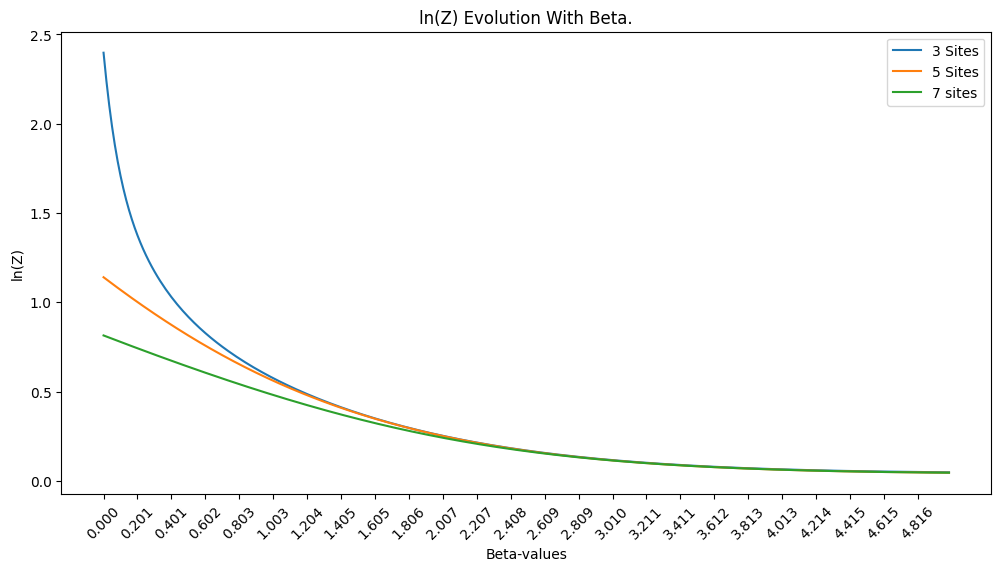

In [114]:
y_data_3 = np.array([np.log(Z(eig_val_3, x))/3 for x in beta_array])
y_data_5 = np.array([np.log(Z(eig_val_5, x))/5 for x in beta_array])
y_data_7 = np.array([np.log(Z(eig_val_7, x))/7 for x in beta_array])

dim_fit = 20

plt.figure(figsize=(12, 6))

plt.plot(beta_array, y_data_3, label=f"3 Sites")
plt.plot(beta_array, y_data_5, label=f"5 Sites")
plt.plot(beta_array, y_data_7, label=f"7 sites")

# scatter_and_fit(beta_array, y_data_3, "3 sites", "blue", degree=dim_fit)
# scatter_and_fit(beta_array, y_data_5, "5 sites", "red", degree=dim_fit)
# scatter_and_fit(beta_array, y_data_7, "7 sites", "green", degree=dim_fit)

# Axis formatting
plt.xticks(beta_array[::12], rotation=45) 
plt.xlabel("Beta-values")
plt.ylabel("ln(Z)")
plt.title("ln(Z) Evolution With Beta.")
plt.legend()
plt.show()

In [100]:
beta_array = np.linspace(0, 3, 1000)

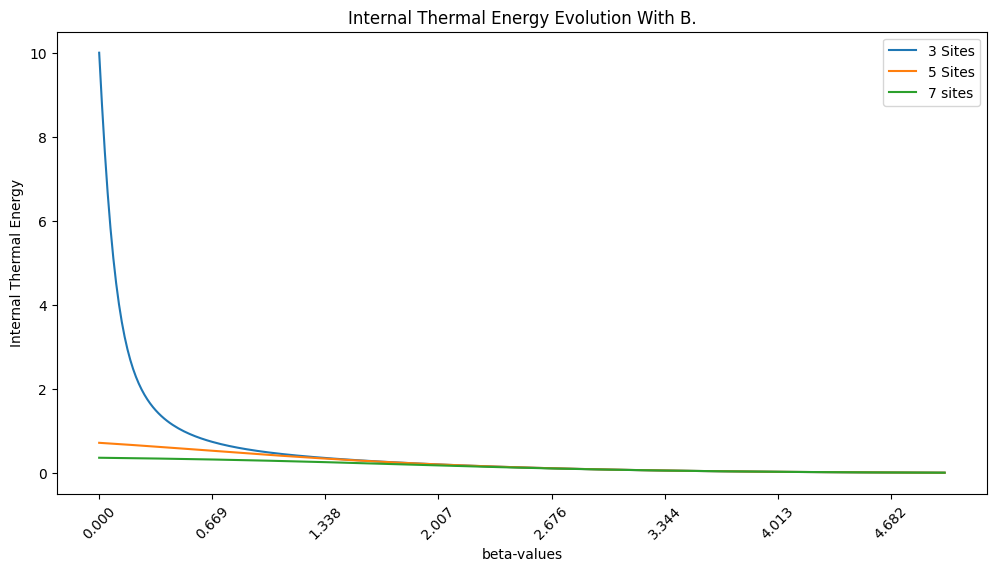

In [115]:
y_data_3 = np.array([U(eig_val_3, x)/3 for x in beta_array])
y_data_5 = np.array([U(eig_val_5, x)/5 for x in beta_array])
y_data_7 = np.array([U(eig_val_7, x)/7 for x in beta_array])

dim_fit = 20

plt.figure(figsize=(12, 6))
plt.plot(beta_array, y_data_3, label=f"3 Sites")
plt.plot(beta_array, y_data_5, label=f"5 Sites")
plt.plot(beta_array, y_data_7, label=f"7 sites")
plt.xticks(beta_array[::40], rotation=45) 
plt.xlabel("beta-values")
plt.ylabel("Internal Thermal Energy")
plt.title("Internal Thermal Energy Evolution With B.")
plt.legend()
plt.show()

/var/folders/vt/f4sbj2d11gbbb9q5816khz2m0000gn/T/ipykernel_76514/1843518141.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return (-1/beta_val) * np.log(Z(eig_val, beta_val))
/var/folders/vt/f4sbj2d11gbbb9q5816khz2m0000gn/T/ipykernel_76514/1843518141.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return (-1/beta_val) * np.log(Z(eig_val, beta_val))
/var/folders/vt/f4sbj2d11gbbb9q5816khz2m0000gn/T/ipykernel_76514/1500171944.py:1: RuntimeWarning: invalid value encountered in scalar divide
  y_data_3 = np.array([A(eig_val_3, x)/3 for x in beta_array])
/var/folders/vt/f4sbj2d11gbbb9q5816khz2m0000gn/T/ipykernel_76514/1500171944.py:2: RuntimeWarning: invalid value encountered in scalar divide
  y_data_5 = np.array([A(eig_val_5, x)/5 for x in beta_array])
/var/folders/vt/f4sbj2d11gbbb9q5816khz2m0000gn/T/ipykernel_76514/1500171944.py:3: RuntimeWarning: invalid value encountered in scalar divide
  y_data_7 = np.array([A(eig_val_7, x)/7 for x in beta_arr

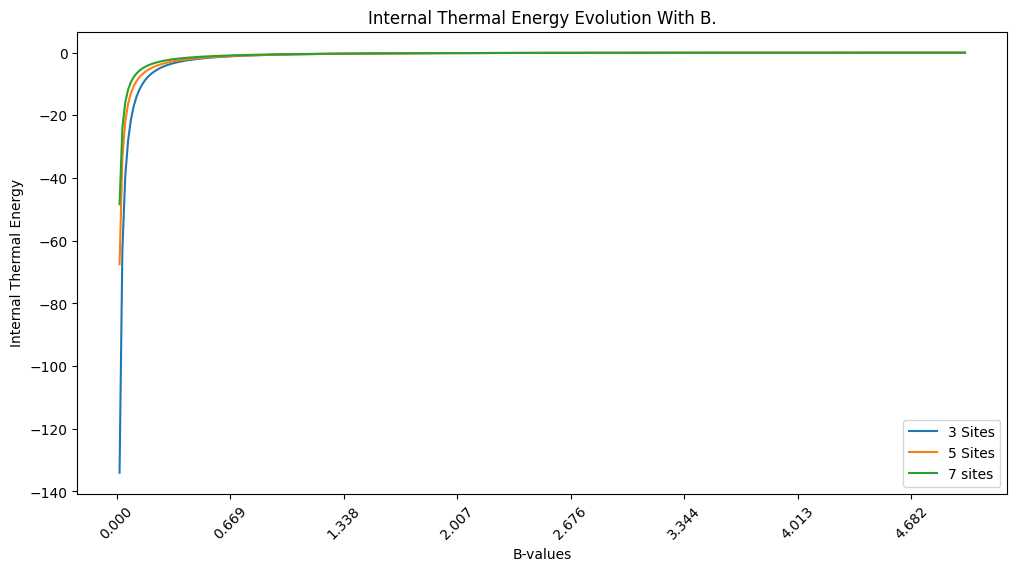

In [121]:
y_data_3 = np.array([A(eig_val_3, x)/3 for x in beta_array])
y_data_5 = np.array([A(eig_val_5, x)/5 for x in beta_array])
y_data_7 = np.array([A(eig_val_7, x)/7 for x in beta_array])

dim_fit = 20

plt.figure(figsize=(12, 6))
plt.plot(beta_array, y_data_3, label=f"3 Sites")
plt.plot(beta_array, y_data_5, label=f"5 Sites")
plt.plot(beta_array, y_data_7, label=f"7 sites")
plt.xticks(beta_array[::40], rotation=45) 
plt.xlabel("B-values")
plt.ylabel("Internal Thermal Energy")
plt.title("Internal Thermal Energy Evolution With B.")
plt.legend()
plt.show()

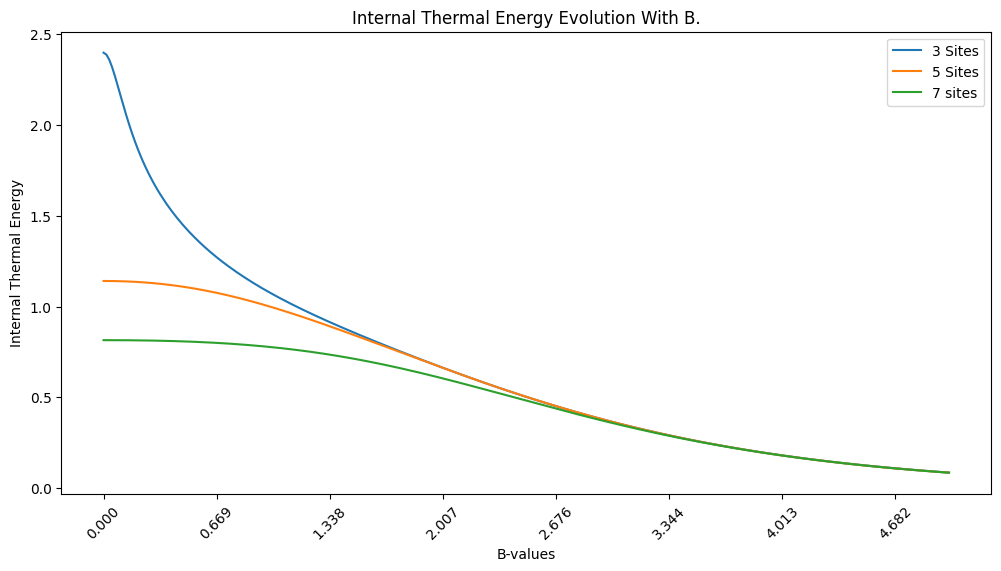

In [120]:
y_data_3 = np.array([S(eig_val_3, x)/3 for x in beta_array])
y_data_5 = np.array([S(eig_val_5, x)/5 for x in beta_array])
y_data_7 = np.array([S(eig_val_7, x)/7 for x in beta_array])

dim_fit = 20

plt.figure(figsize=(12, 6))
plt.plot(beta_array, y_data_3, label=f"3 Sites")
plt.plot(beta_array, y_data_5, label=f"5 Sites")
plt.plot(beta_array, y_data_7, label=f"7 sites")
plt.xticks(beta_array[::40], rotation=45) 
plt.xlabel("B-values")
plt.ylabel("Internal Thermal Energy")
plt.title("Internal Thermal Energy Evolution With B.")
plt.legend()
plt.show()

In [128]:
beta_array = np.linspace(0, 20, 1000)

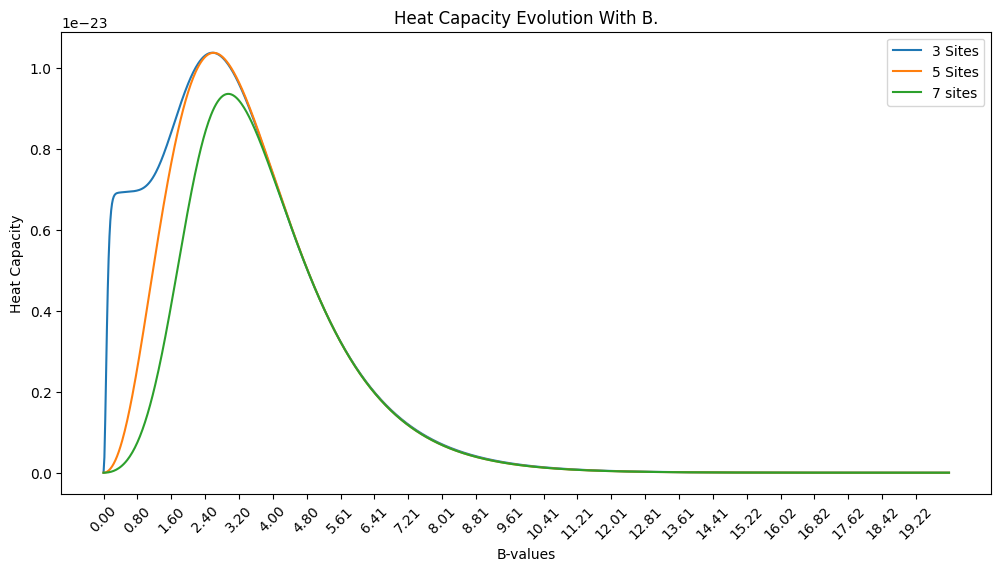

In [129]:
y_data_3 = np.array([heat_capacity(eig_val_3, x)/3 for x in beta_array])
y_data_5 = np.array([heat_capacity(eig_val_5, x)/5 for x in beta_array])
y_data_7 = np.array([heat_capacity(eig_val_7, x)/7 for x in beta_array])

dim_fit = 20

plt.figure(figsize=(12, 6))
plt.plot(beta_array, y_data_3, label=f"3 Sites")
plt.plot(beta_array, y_data_5, label=f"5 Sites")
plt.plot(beta_array, y_data_7, label=f"7 sites")
plt.xticks(beta_array[::40], rotation=45) 
plt.xlabel("B-values")
plt.ylabel("Heat Capacity")
plt.title("Heat Capacity Evolution With B.")
plt.legend()
plt.show()